In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                      start=start_date,
                      end=end_date,
                      progress=False)
print(data.head())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-02-20  180.706726  181.572633  179.154060  180.935641  53665600
2024-02-21  181.463181  182.030494  179.810978  181.084962  41529700
2024-02-22  183.503510  184.090748  181.602498  182.617693  52292200
2024-02-23  181.662231  184.170377  181.373586  184.140520  45119700
2024-02-26  180.308624  181.901096  179.801011  181.383551  40867400


In [ ]:
data["Date"] = data.index
data = data[["Date", "Open", "High",
             "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

Price        Date        Open        High         Low       Close    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-02-20  180.935641  181.572633  179.154060  180.706726  53665600
1      2024-02-21  181.084962  182.030494  179.810978  181.463181  41529700
2      2024-02-22  182.617693  184.090748  181.602498  183.503510  52292200
3      2024-02-23  184.140520  184.170377  181.373586  181.662231  45119700
4      2024-02-26  181.383551  181.901096  179.801011  180.308624  40867400


Yukardaki kısımda biz Yahooda ki hisse senetlerinin bir tanesinin güncel verilerini çekmek istedik onun hakkında işlemler yaptık.

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

Price        Date        Open        High         Low       Close    Volume
Ticker                   GOOG        GOOG        GOOG        GOOG      GOOG
245    2025-02-06  190.990005  193.830002  190.490005  193.309998  20816600
246    2025-02-07  192.740005  193.014999  185.100006  187.139999  29565700
247    2025-02-10  189.059998  189.990005  187.610001  188.199997  16606000
248    2025-02-11  186.835007  188.800003  186.080002  187.070007  13028100
249    2025-02-12  185.229996  186.830002  183.630005  185.429993  17601600


In [ ]:
data = data[["Date", "Close"]]
print(data.head())

Price        Date       Close
Ticker                   GOOG
0      2024-02-14  146.613205
1      2024-02-15  143.424667
2      2024-02-16  141.252457
3      2024-02-20  141.690887
4      2024-02-21  143.325012


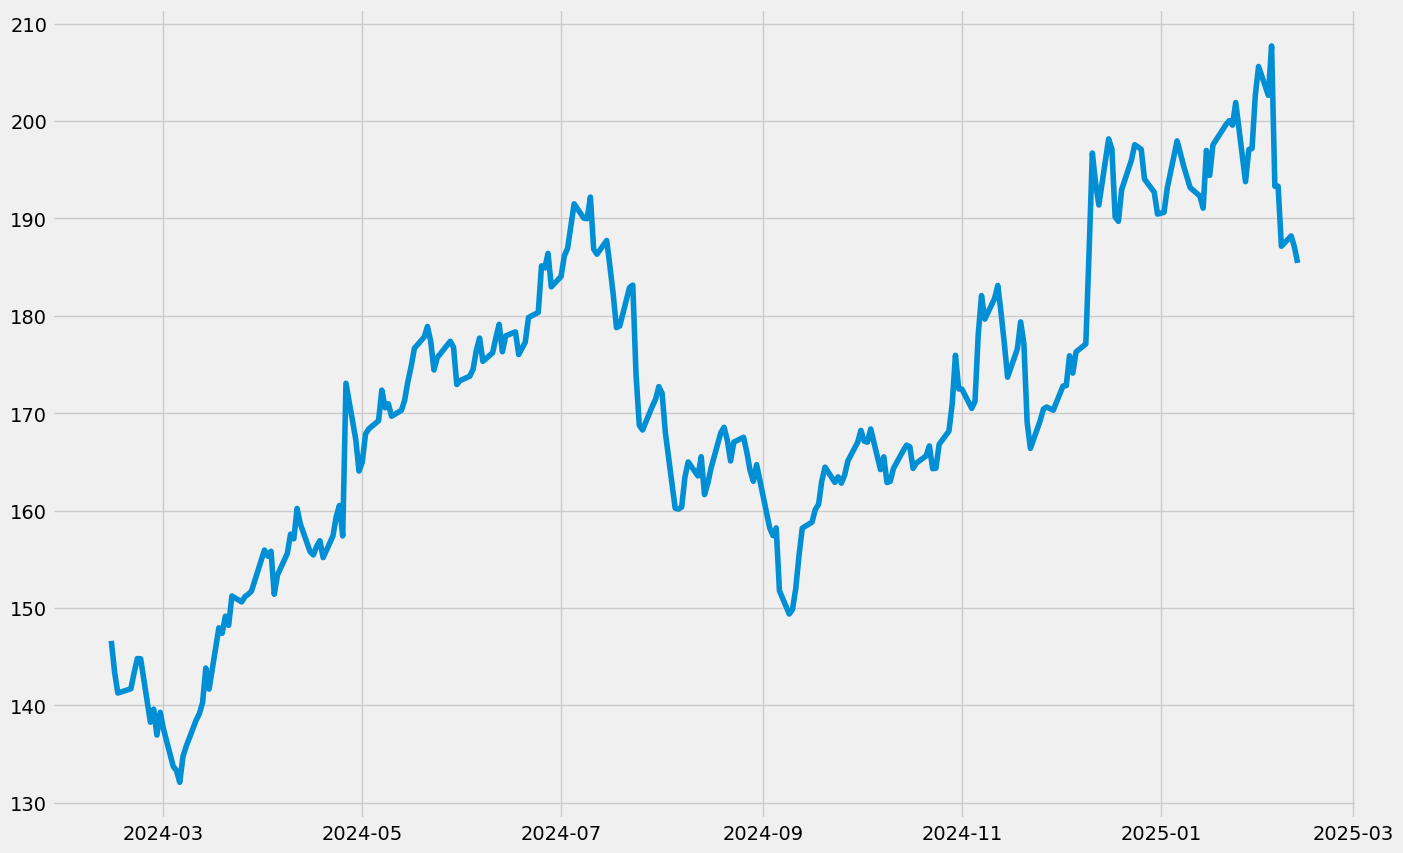

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

seasonal decomposition biz burda Veri setimizin durağan mı yoksa mevsimsel mi olduğunu düzgün bir şekilde kontrol etmek için, zaman serisi verilerini daha iyi anlamak için zaman serisi verilerini trend, mevsimsel ve kalıntılara ayıran mevsimsel ayrıştırma yöntemini kullandık

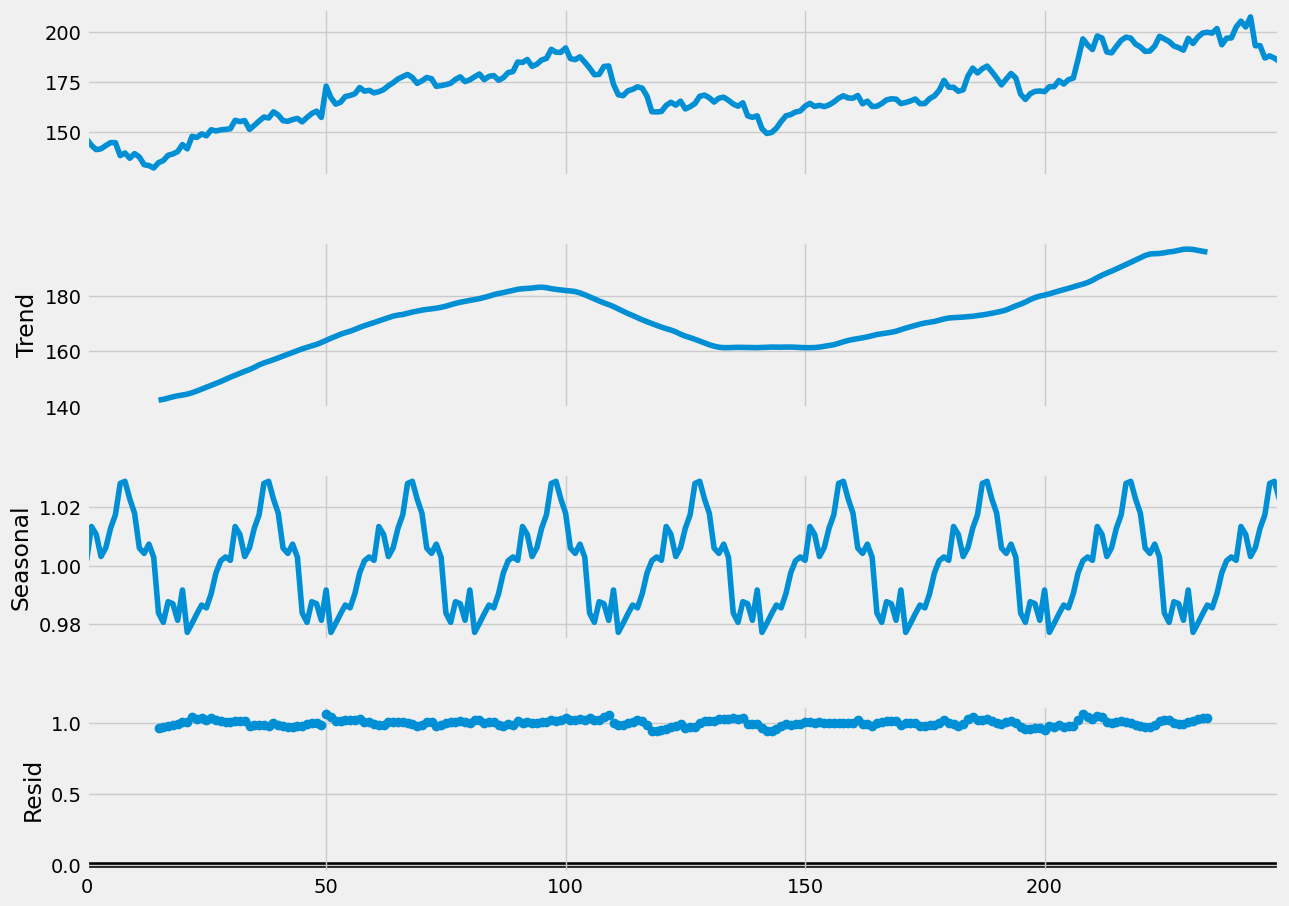

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(data["Close"],
                            model='multiplicative', period=30)  # Değiştirilen kısım

fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

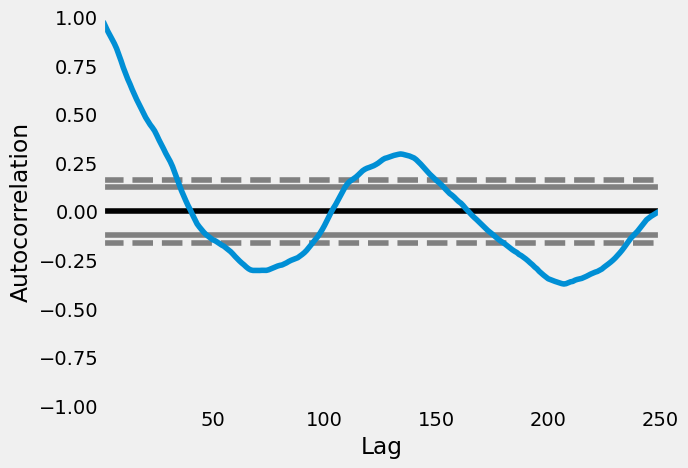

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

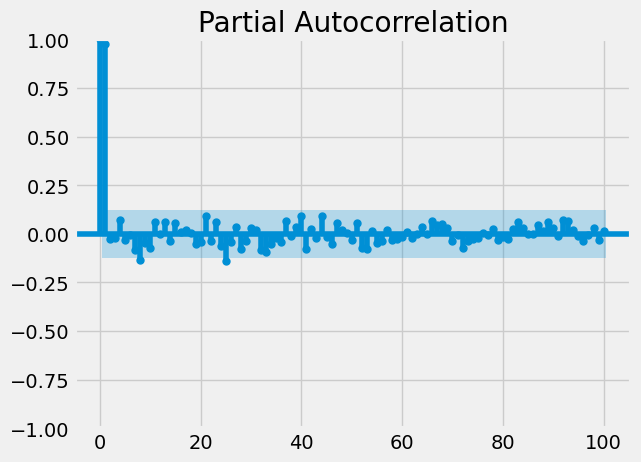

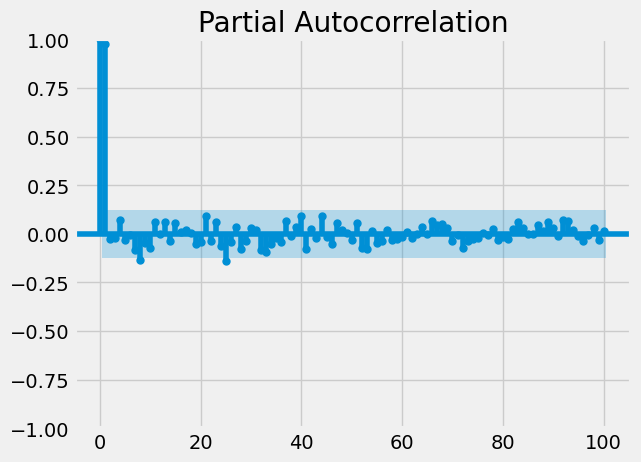

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 5, 1, 2
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

print(fitted.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -633.060
Date:                Thu, 13 Feb 2025   AIC                           1282.120
Time:                        08:53:16   BIC                           1310.260
Sample:                             0   HQIC                          1293.447
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2208      0.611     -0.361      0.718      -1.419       0.977
ar.L2          0.6284      0.612      1.027      0.304      -0.571       1.828
ar.L3         -0.0877      0.081     -1.077      0.2

In [ ]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      146.613175
2      143.491045
3      141.358589
4      142.044760
          ...    
245    194.785120
246    192.645800
247    189.179093
248    188.269440
249    186.999417
Name: predicted_mean, Length: 250, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -612.683
Date:                            Thu, 13 Feb 2025   AIC                           1255.367
Time:                                    08:54:55   BIC                           1307.388
Sample:                                         0   HQIC                          1276.334
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5687      0.409     -1.391      0.164      -1.370       0.233
ar.L2         -0.9037      0.395   

In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    184.807753
251    185.583008
252    185.222511
253    184.939781
254    186.621467
255    185.291424
256    188.194909
257    189.459886
258    189.578102
259    189.687669
260    190.706101
Name: predicted_mean, dtype: float64


<Axes: >

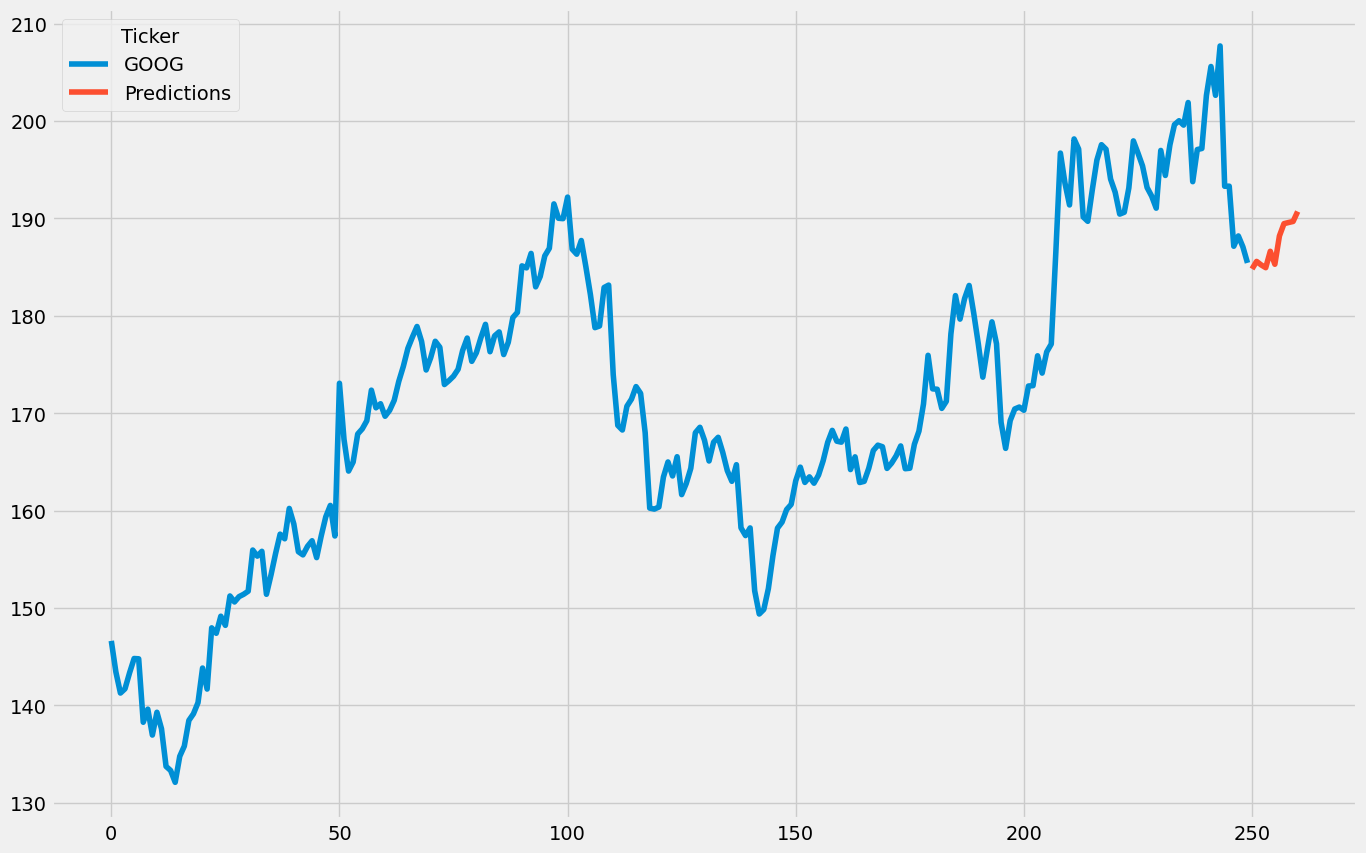

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

Lütfen bir hisse senedi sembolü girin (örnek: AAPL, GOOG, TSLA): TSLA
TSLA için veri çekiliyor...


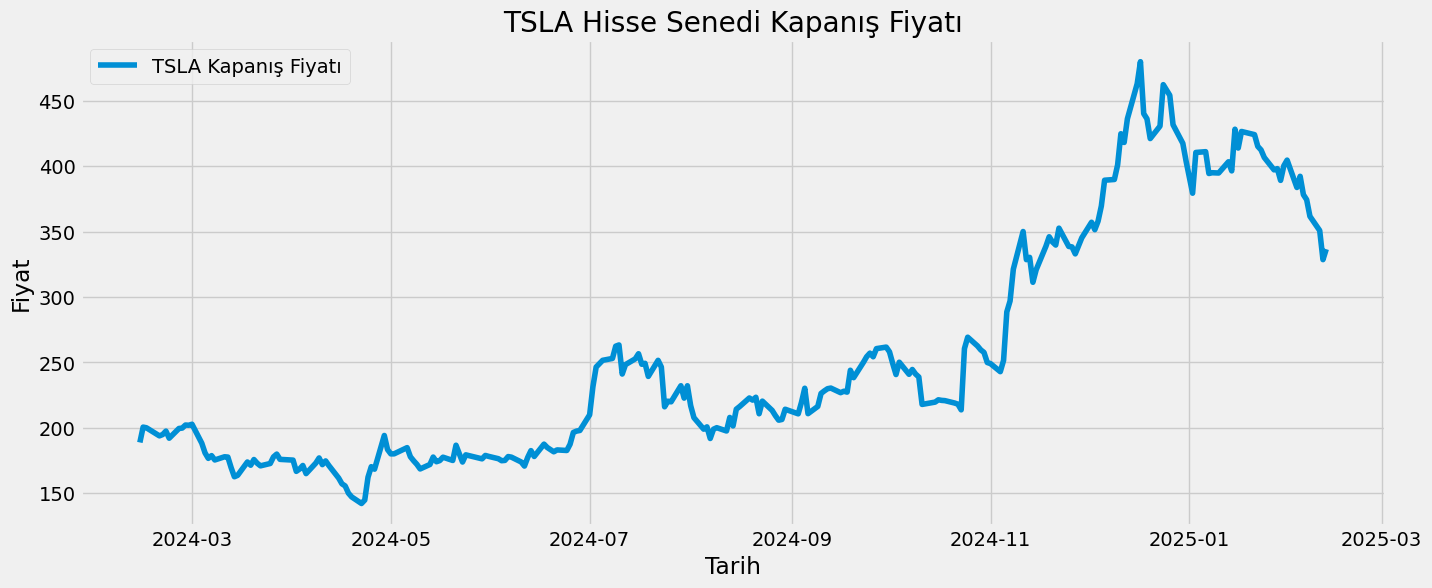

Mevsimsel ayrıştırma yapılıyor...


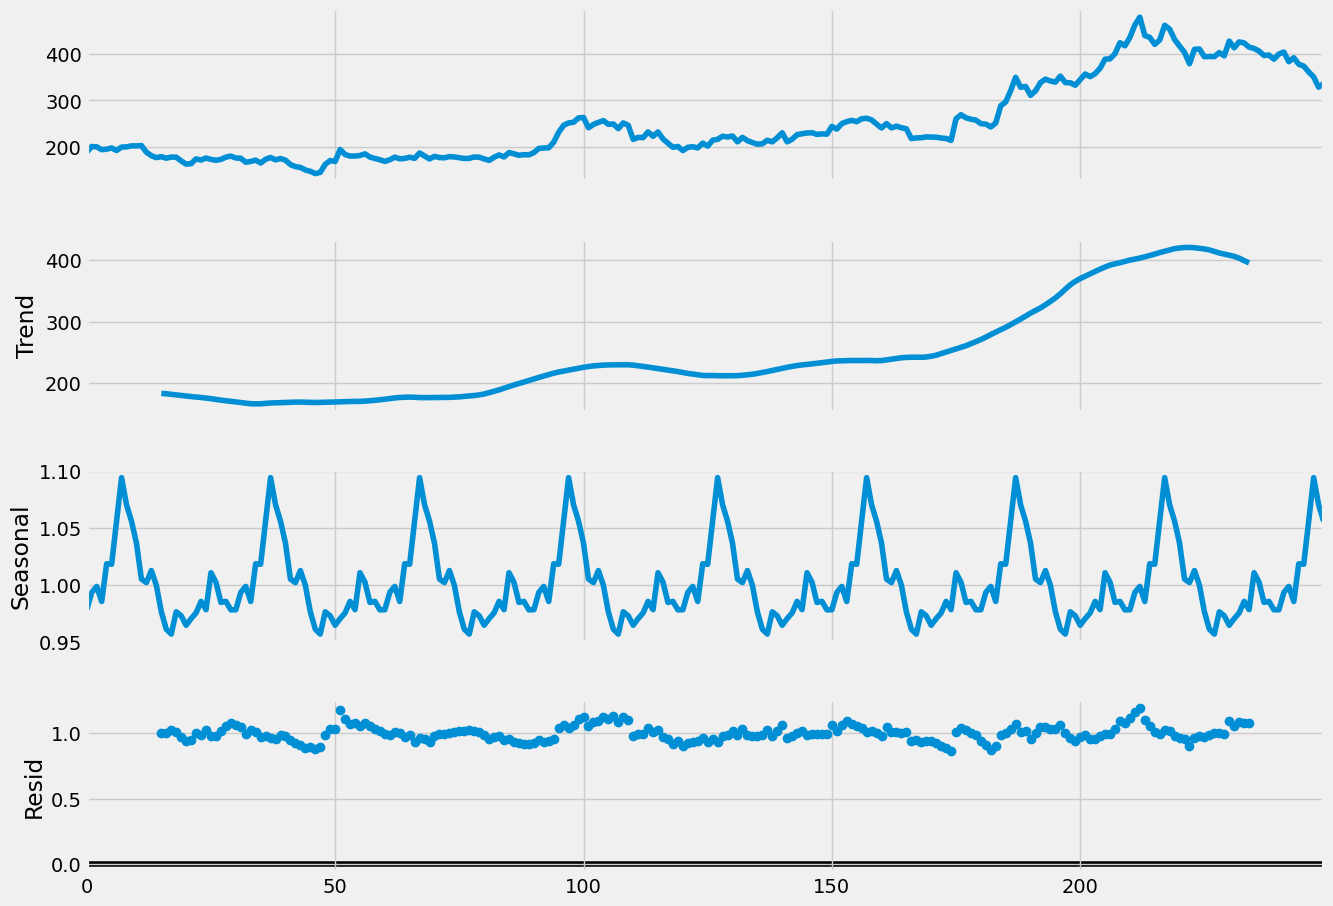

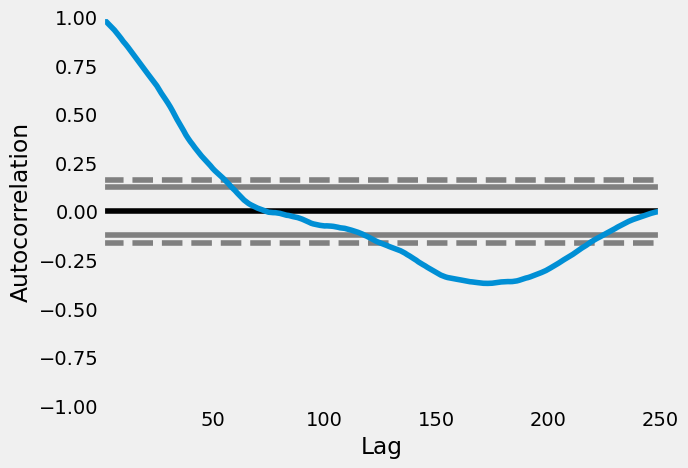

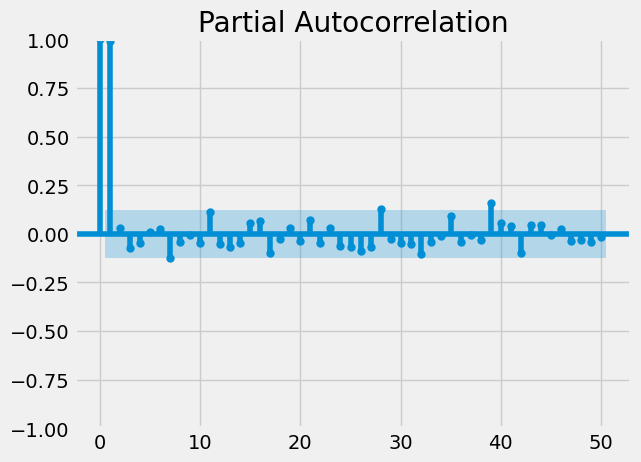

ARIMA modeli eğitiliyor...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   TSLA   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -943.317
Date:                Thu, 13 Feb 2025   AIC                           1902.633
Time:                        09:02:15   BIC                           1930.773
Sample:                             0   HQIC                          1913.960
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7602      0.265     -2.874      0.004      -1.279      -0.242
ar.L2         -0.5950      0.284     -2.097      0.036      -1.151      -0.039
ar.L3          0.0342      0.061      0.564      0.5

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               TSLA   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -907.425
Date:                            Thu, 13 Feb 2025   AIC                           1844.849
Time:                                    09:03:19   BIC                           1896.870
Sample:                                         0   HQIC                          1865.817
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1989      0.126      1.577      0.115      -0.048       0.446
ar.L2         -0.8629      0.130   

<Figure size 1500x600 with 0 Axes>

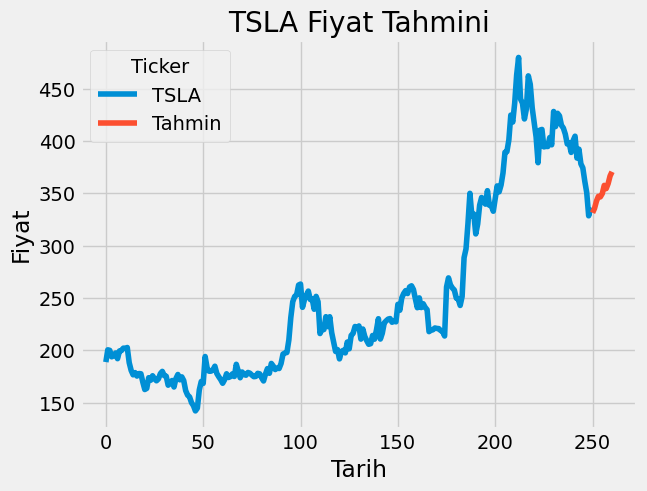

In [21]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import date, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Kullanıcıdan hisse senedi sembolünü al
hisse = input("Lütfen bir hisse senedi sembolü girin (örnek: AAPL, GOOG, TSLA): ").upper()

# Tarihleri belirle (son 1 yıl)
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

# Hisse verisini indir
print(f"{hisse} için veri çekiliyor...")
data = yf.download(hisse, start=start_date, end=end_date, progress=False)

# Veriyi düzenle
data["Date"] = data.index
data = data[["Date", "Close"]]
data.reset_index(drop=True, inplace=True)

# Veriyi görselleştir
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6))
plt.plot(data["Date"], data["Close"], label=f"{hisse} Kapanış Fiyatı")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.title(f"{hisse} Hisse Senedi Kapanış Fiyatı")
plt.legend()
plt.show()

# Mevsimsel ayrıştırma (Seasonal Decompose)
print("Mevsimsel ayrıştırma yapılıyor...")
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)

fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()

# Otokorelasyon (Autocorrelation) grafiği
pd.plotting.autocorrelation_plot(data["Close"])
plt.show()

# Kısmi Otokorelasyon Grafiği (Partial Autocorrelation)
plot_pacf(data["Close"], lags=50)
plt.show()

# ARIMA Modeli
print("ARIMA modeli eğitiliyor...")
p, d, q = 5, 1, 2
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

# Tahmin yap
print("ARIMA tahminleri yapılıyor...")
predictions = fitted.predict()
print(predictions)

# SARIMA Modeli
print("SARIMA modeli eğitiliyor...")
model_sarima = sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
fitted_sarima = model_sarima.fit()
print(fitted_sarima.summary())

# Gelecek 10 gün için tahmin yap
future_predictions = fitted_sarima.predict(len(data), len(data) + 10)
print(future_predictions)

# Tahminleri çizdir
plt.figure(figsize=(15, 6))
data["Close"].plot(legend=True, label="Gerçek Veri")
future_predictions.plot(legend=True, label="Tahmin")
plt.title(f"{hisse} Fiyat Tahmini")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.show()
